<a href="https://colab.research.google.com/github/mohammed1faisal/Python_Projects/blob/main/FOREST_FIRES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from google.colab import files
data= files.upload()

Saving amazon.csv to amazon.csv


In [2]:
df=pd.read_csv("amazon.csv", encoding=('ISO-8859-1'),low_memory=False)


In [3]:
df.shape

(6454, 5)

In [4]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


**FINDING OUT IF THE DATA SET HAS ANY NULL VALUES**

In [6]:
df.isnull().sum()


year      0
state     0
month     0
number    0
date      0
dtype: int64

**FINDING OUT IF DATA SET HAS ANY DUPLICATES AND TO DROP IF ANY**

In [7]:
dup=df.duplicated().any()

In [8]:
dup

True

In [9]:
df.drop_duplicates()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [10]:
df.shape

(6454, 5)

In [11]:
df['new_month']=df['month'].map({'Janeiro':'jan',

                                 'Dezembro':'dec'
})

In [12]:
df.head()

,year,state,month,number,date,new_month
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan
3,2001,Acre,Janeiro,0.0,2001-01-01,jan
4,2002,Acre,Janeiro,0.0,2002-01-01,jan


In [13]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'new_month'], dtype='object')

**FINDING TOTAL FOREST FIRES MONTH WISE**



In [14]:
date2=df.groupby('month')['number'].sum()

In [15]:
date2

month
Abril        28188.770
Agosto       88050.435
Dezembro     57535.480
Fevereiro    30848.050
Janeiro      47747.844
Julho        92326.113
Junho        56010.675
Maio         34731.363
Março        30717.405
Novembro     85508.054
Outubro      88681.579
Setembro     58578.305
Name: number, dtype: float64

 In which year maximum no of forest fires were reported?


In [16]:
data1=df.groupby('year')['number'].sum().reset_index()

In [17]:
data1.head()

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29071.612
4,2002,37390.600


In [18]:
import matplotlib.pyplot as plt

<Axes: xlabel='year', ylabel='number'>

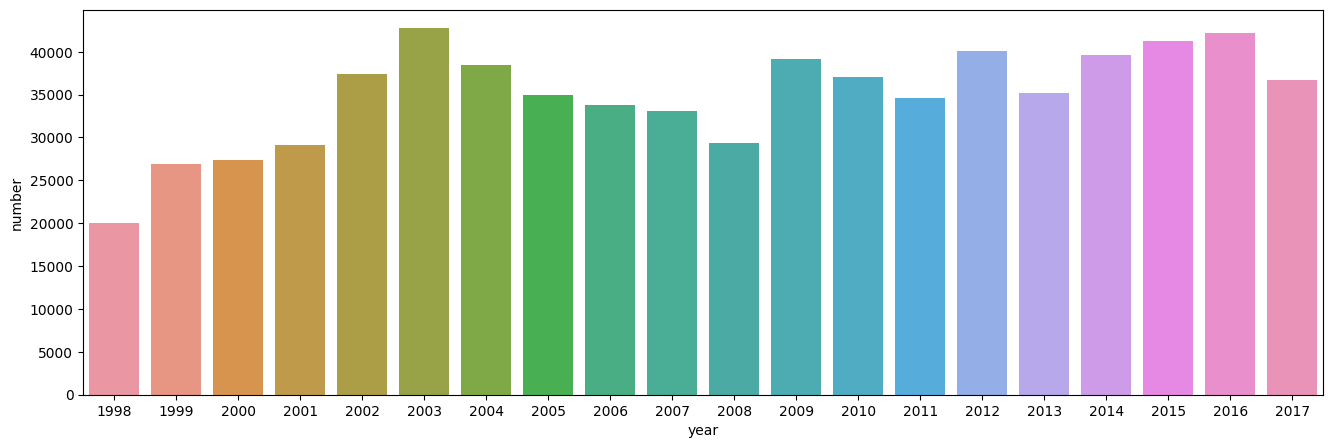

In [19]:
plt.figure(figsize=(16,5))
sns.barplot(x="year" , y="number", data=data1)

12. In which state did maximum no of fires reported?


In [20]:
data3=df.groupby('state')['number'].sum().reset_index()

In [21]:
data3.head()

,state,number
0,Acre,18464.030
1,Alagoas,4644.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226


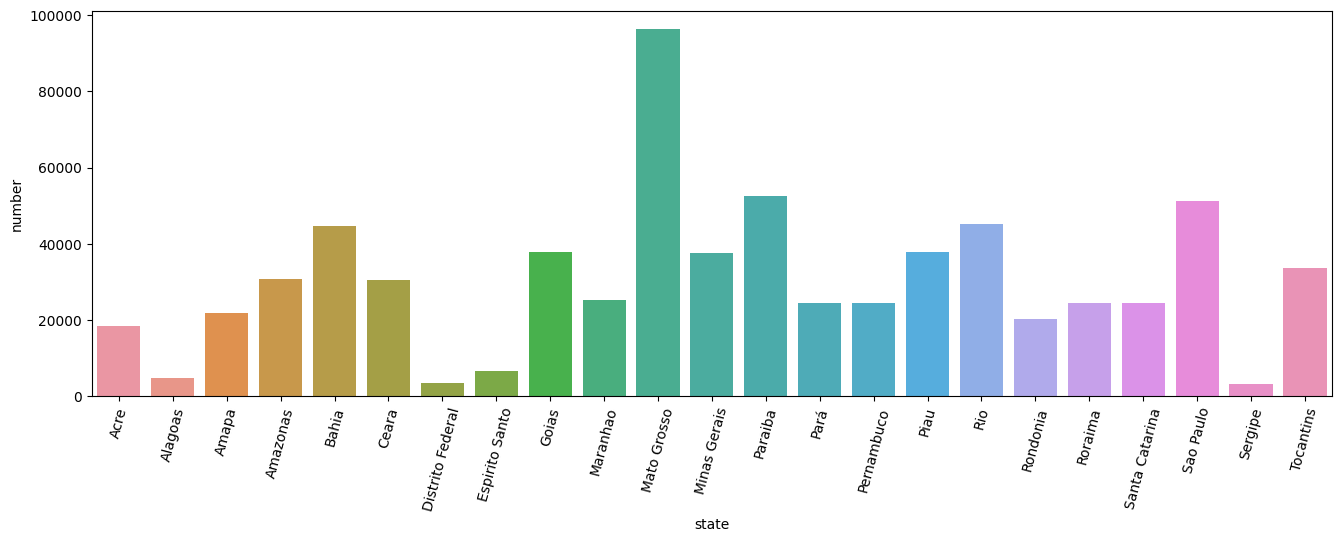

In [22]:
plt.figure(figsize=(16,5))
sns.barplot(x="state" , y="number", data=data3)
plt.xticks(rotation=75)
plt.show()

**13.FIND TOTAL NO OF FIRES REPORTED IN AMAZONAS**

In [23]:
df[df['state']=='Amazonas']['number'].sum()

30650.129

**14.DISPLAY NO OF FIRES REPORTED IN AMAZONAS YEAR WISE**

In [24]:
data4=df[df['state']=='Amazonas']


In [25]:
data4.head()

,year,state,month,number,date,new_month
718,1998,Amazonas,Janeiro,0.0,1998-01-01,jan
719,1999,Amazonas,Janeiro,3.0,1999-01-01,jan
720,2000,Amazonas,Janeiro,7.0,2000-01-01,jan
721,2001,Amazonas,Janeiro,3.0,2001-01-01,jan
722,2002,Amazonas,Janeiro,17.0,2002-01-01,jan


In [26]:
data5=data4.groupby('year')['number'].sum().reset_index()

In [27]:
data5

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


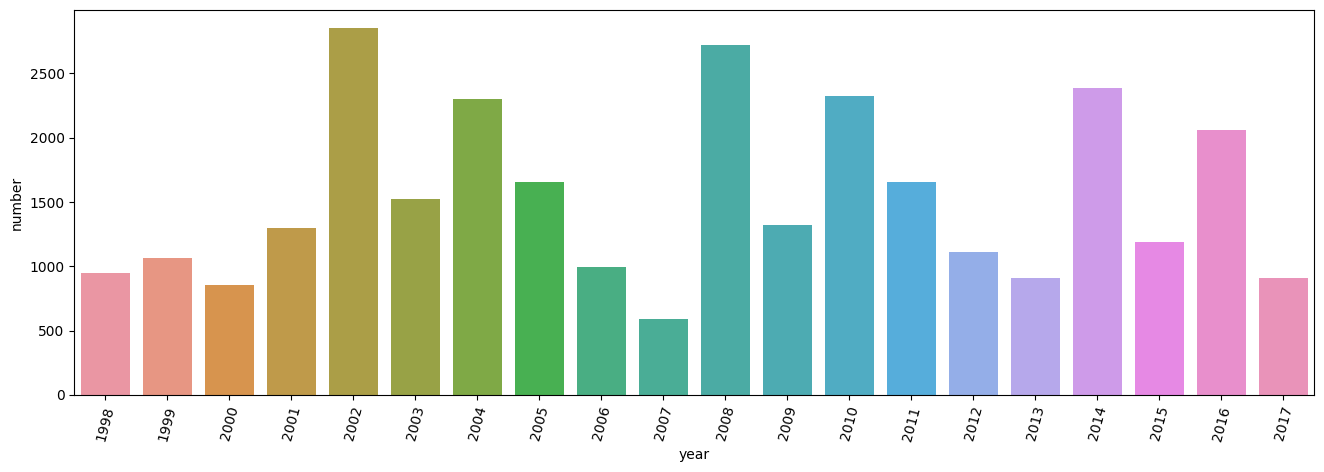

In [28]:
plt.figure(figsize=(16,5))
sns.barplot(x = "year" , y="number" , data=data5)
plt.xticks(rotation=75)
plt.show()

**FIND TOTAL NO OF FIRES THAT WHERE REPORTED IN THE YEAR 2015 AND DATA BASED ON EACH MONTH**

In [29]:
data6 = df[df['year']==2015].groupby('month')['number'].sum().reset_index()

In [30]:
data6

,month,number
0,Abril,2573.000
1,Agosto,4363.125
2,Dezembro,4088.522
3,Fevereiro,2309.000
4,Janeiro,4635.000
5,Julho,4364.392
6,Junho,3260.552
7,Maio,2384.000
8,Março,2202.000
9,Novembro,4034.518


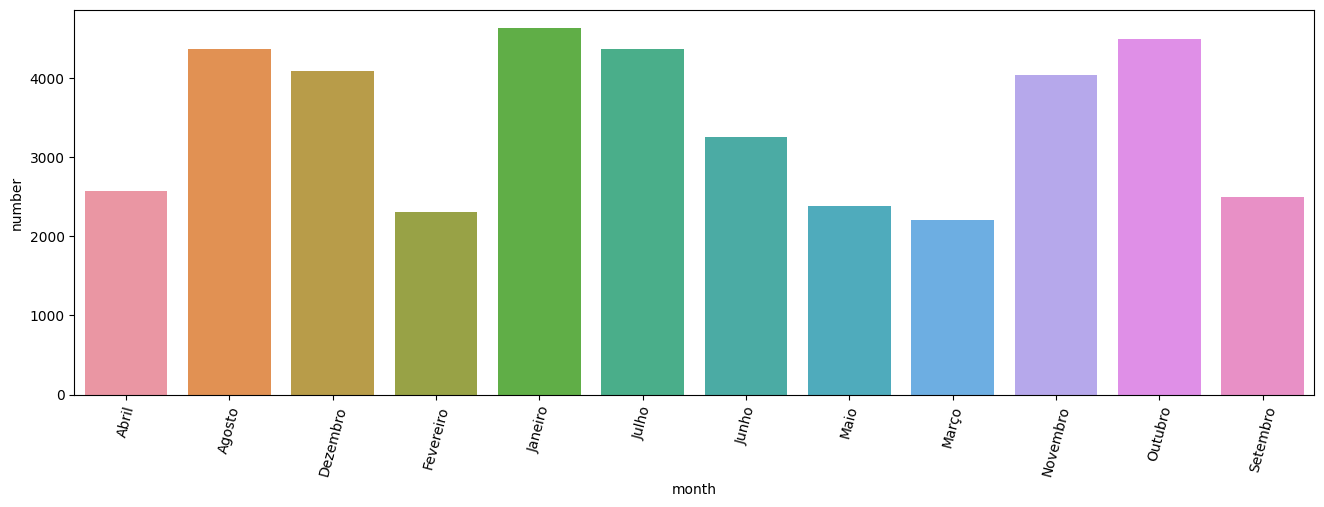

In [31]:
plt.figure(figsize=(16,5))
sns.barplot(x = "month" , y="number" , data=data6)
plt.xticks(rotation=75)
plt.show()

In [32]:
df.columns

Index(['year', 'state', 'month', 'number', 'date', 'new_month'], dtype='object')

**FING AVG NO OF FIRES STARTING FROM HIGHEST TO LOWEST STATE WISE**

In [33]:
data8=df.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()

In [34]:
data8

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,201.351523
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,109.698573


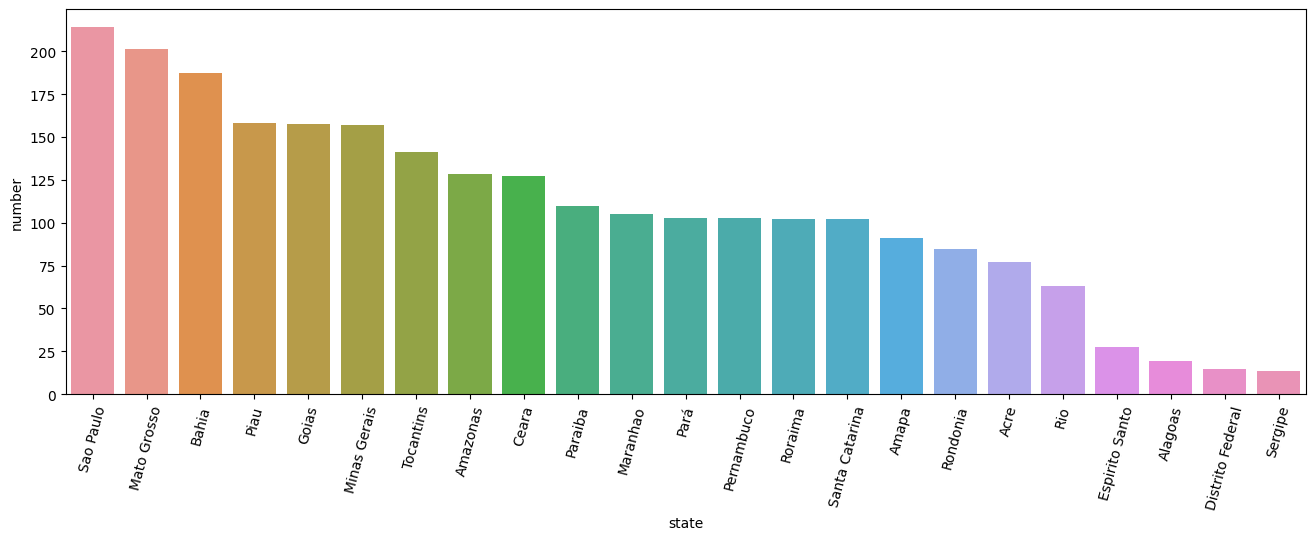

In [35]:
plt.figure(figsize=(16,5))
sns.barplot(x = "state" , y="number" , data=data8)
plt.xticks(rotation=75)
plt.show()

**FIND THE STATE NAMES WHERE FIRES WHERE REPORTED IN DECEMBER**

In [36]:
df.columns


Index(['year', 'state', 'month', 'number', 'date', 'new_month'], dtype='object')

In [37]:
df.month

0        Janeiro
1        Janeiro
2        Janeiro
3        Janeiro
4        Janeiro
          ...   
6449    Dezembro
6450    Dezembro
6451    Dezembro
6452    Dezembro
6453    Dezembro
Name: month, Length: 6454, dtype: object

In [38]:
df[df['month']=='Dezembro']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

Above is the list/array of states where fire was reported in the month of december.


SUCCESSFULLY CLEANED AND ANALYZIED THE DATA,ANSWERING ALL THE GIVEN QUESTIONS.